In [1]:
import pandas as pd

In [2]:
pima = pd.read_csv('Datasets/diabetes2.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
'''In particular, all patients here are females at least 21 years old of Pima Indian heritage
Labels:
1: diabetes
0: no diabetes'''

'In particular, all patients here are females at least 21 years old of Pima Indian heritage\nLabels:\n1: diabetes\n0: no diabetes'

In [5]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

In [6]:
# splitting data
from sklearn.model_selection import train_test_split
X = pima[feature_cols]
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression 
# training the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/zainraza/Downloads/dev/courses/DS/DS-2.1-Machine-Learning/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# make prediction
y_pred = logreg.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]


In [9]:
print(y_test.values.T)  # transposing data for comparison

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


In [10]:
# Stats on y_test
actual_diabetes = len([val for val in y_test if val == 1])

In [11]:
actual_diabetes

62

In [12]:
actual_non_diabetes = len([val for val in y_test if val == 0])

In [13]:
actual_non_diabetes

130

In [14]:
# alternatively, you use pandas methods to get stats on y_test
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [15]:
# why 192 elements in y_test?
# verfiy that it's 25% of the data:
len(y) * .25 == len(y_test)

True

In [16]:
# do the same for training data
len(y) * .75 == len(y_train)

True

(array([130.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  62.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

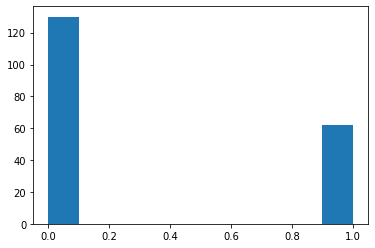

In [17]:
import matplotlib.pyplot as plt

plt.hist(y_test)

In [18]:
def compute_confusion_matrix(y_test, y_pred):
    '''Counts the true and false negatives and positives computed by a model.'''
    tn, tp, fn, fp = 0, 0, 0, 0
    
    for actual, predicted in zip(y_test, y_pred):
        if actual == predicted == 1:
            tn += 1
        elif actual == predicted == 0:
            tp += 1
        elif actual == 0 and not predicted == actual:
            fn += 1
        elif actual == 1 and not predicted == actual:
            fp += 1
            
    assert tn + tp + fn + fp == len(y_test)  # sum of counts = length of y_test/y_pred
    print(f'True Positives: {tp}')
    print(f'True Negatives: {tn}')
    print(f'False Positives: {fp}')
    print(f'False Negatives {fn}')
    return tn, tp, fn, fp
     
compute_confusion_matrix(y_test, y_pred)

True Positives: 118
True Negatives: 15
False Positives: 47
False Negatives 12


(15, 118, 12, 47)

In [19]:
# using the built-in function
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[118  12]
 [ 47  15]]
